# Predicting whether a person will suffer from Coronary Heart Disease (CHD) or not

#### Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Uploading the dataset

In [2]:
df = pd.read_csv('D://framingham.csv')
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## Data Analysis & Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [5]:
df.shape

(4238, 16)

In [6]:
duplicated_rows = df[df.duplicated()]
print("Number of duplicated rows are :",duplicated_rows.shape)

Number of duplicated rows are : (0, 16)


<AxesSubplot:xlabel='currentSmoker', ylabel='count'>

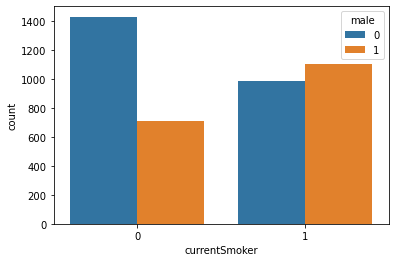

In [7]:
sns.countplot(x='currentSmoker',hue='male',data=df)

#### From the above plot we can visualize that most of the current smoker are male

<AxesSubplot:xlabel='diabetes', ylabel='count'>

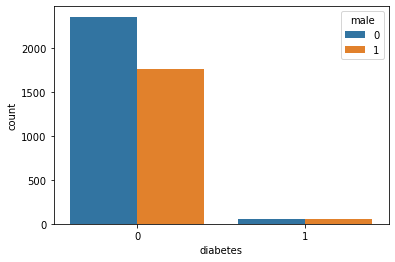

In [8]:
sns.countplot(x='diabetes',hue='male',data=df)

#### In the dataset the number of males and females having diabetes are same .

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

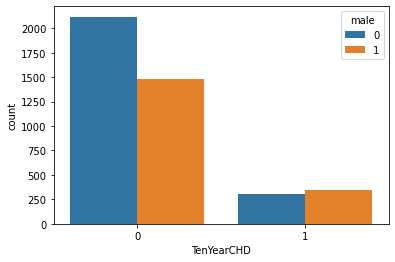

In [9]:
sns.countplot(x='TenYearCHD',hue='male',data=df)

#### From the above plot we can visualize that the number of males suffering from CHD is more than the number of females .

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

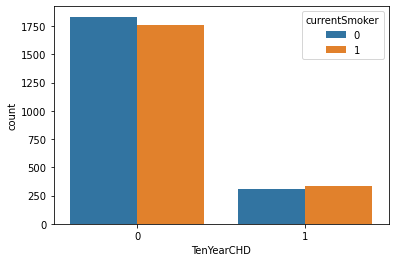

In [10]:
sns.countplot(x='TenYearCHD',hue='currentSmoker',data=df)

#### From the above plot we can visualize that most of the people suffering from heart disease are current smokers .

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

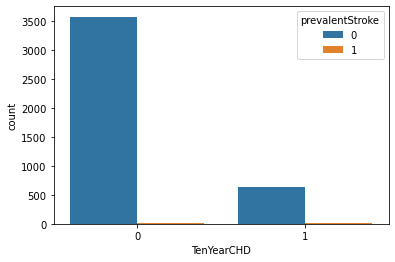

In [11]:
sns.countplot(x='TenYearCHD',hue='prevalentStroke',data=df)

#### From the graph we can visualize that none of the people in the dataset had prevalent stroke . 

<AxesSubplot:xlabel='TenYearCHD', ylabel='age'>

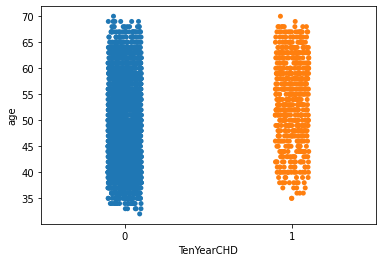

In [12]:
sns.stripplot(x='TenYearCHD',y='age',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

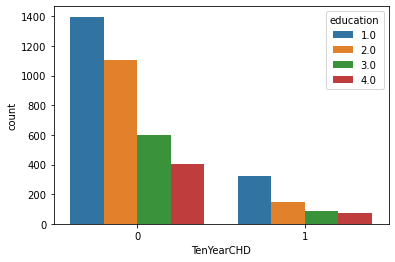

In [13]:
sns.countplot(x='TenYearCHD',hue='education',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='cigsPerDay'>

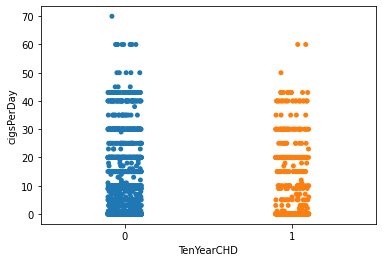

In [14]:
sns.stripplot(x='TenYearCHD',y='cigsPerDay',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='totChol'>

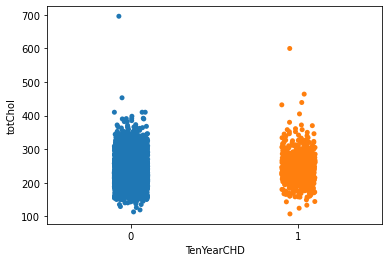

In [15]:
sns.stripplot(x='TenYearCHD',y='totChol',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='sysBP'>

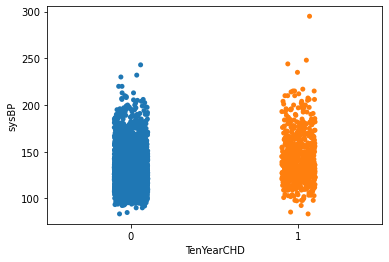

In [16]:
sns.stripplot(x='TenYearCHD',y='sysBP',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='diaBP'>

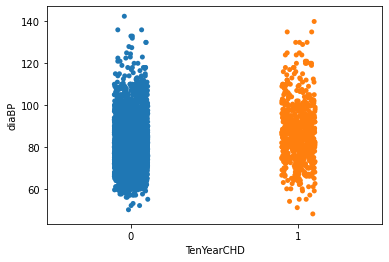

In [17]:
sns.stripplot(x='TenYearCHD',y='diaBP',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='BMI'>

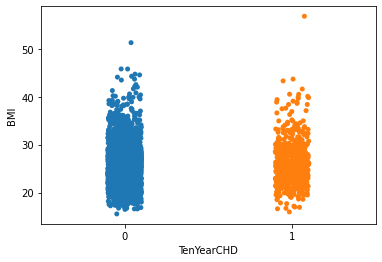

In [18]:
sns.stripplot(x='TenYearCHD',y='BMI',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='heartRate'>

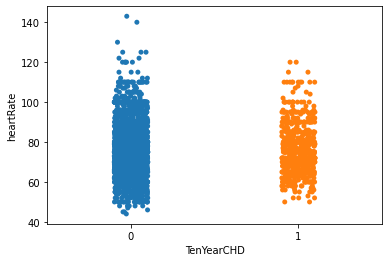

In [19]:
sns.stripplot(x='TenYearCHD',y='heartRate',data=df)

<AxesSubplot:xlabel='TenYearCHD', ylabel='glucose'>

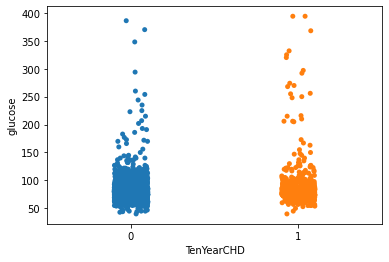

In [20]:
sns.stripplot(x='TenYearCHD',y='glucose',data=df)

In [21]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [22]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [23]:
df['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [24]:
df.dropna(inplace=True)

In [25]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [26]:
df.head(4)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1


In [27]:
df['BPMeds'].unique()

array([0., 1.])

In [28]:
df1 = df

In [29]:
df1.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Removing the columns that are not required 

In [30]:
df1.drop(['education','heartRate','glucose','prevalentStroke'],axis=1,inplace=True)

In [31]:
df1.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,TenYearCHD
0,1,39,0,0.0,0.0,0,0,195.0,106.0,70.0,26.97,0
1,0,46,0,0.0,0.0,0,0,250.0,121.0,81.0,28.73,0
2,1,48,1,20.0,0.0,0,0,245.0,127.5,80.0,25.34,0
3,0,61,1,30.0,0.0,1,0,225.0,150.0,95.0,28.58,1
4,0,46,1,23.0,0.0,0,0,285.0,130.0,84.0,23.10,0


### Here we will be using logistic regression to find whether a person will suffer from heart disease or not . 

## Training and Testing of model

In [32]:
x = df1.drop('TenYearCHD',axis=1)
y = df1['TenYearCHD']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [41]:
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_pred = logreg.predict(x_test)

In [43]:
df2 = pd.DataFrame({'Actual :':y_test,'Predicted :':y_pred})
df2

,Actual :,Predicted :
1614,0,0
860,0,0
646,0,0
3666,0,0
112,0,0
...,...,...
3398,0,0
99,0,0
1532,0,0
1697,0,0


In [44]:
from sklearn.metrics import classification_report

In [45]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.86      0.99      0.92       627\n           1       0.58      0.07      0.12       105\n\n    accuracy                           0.86       732\n   macro avg       0.72      0.53      0.52       732\nweighted avg       0.82      0.86      0.81       732\n'

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,y_pred)

array([[622,   5],
       [ 98,   7]], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8592896174863388

# So our model is approximately 86% accurate